<h2>Visualização dos Dados</h2>

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



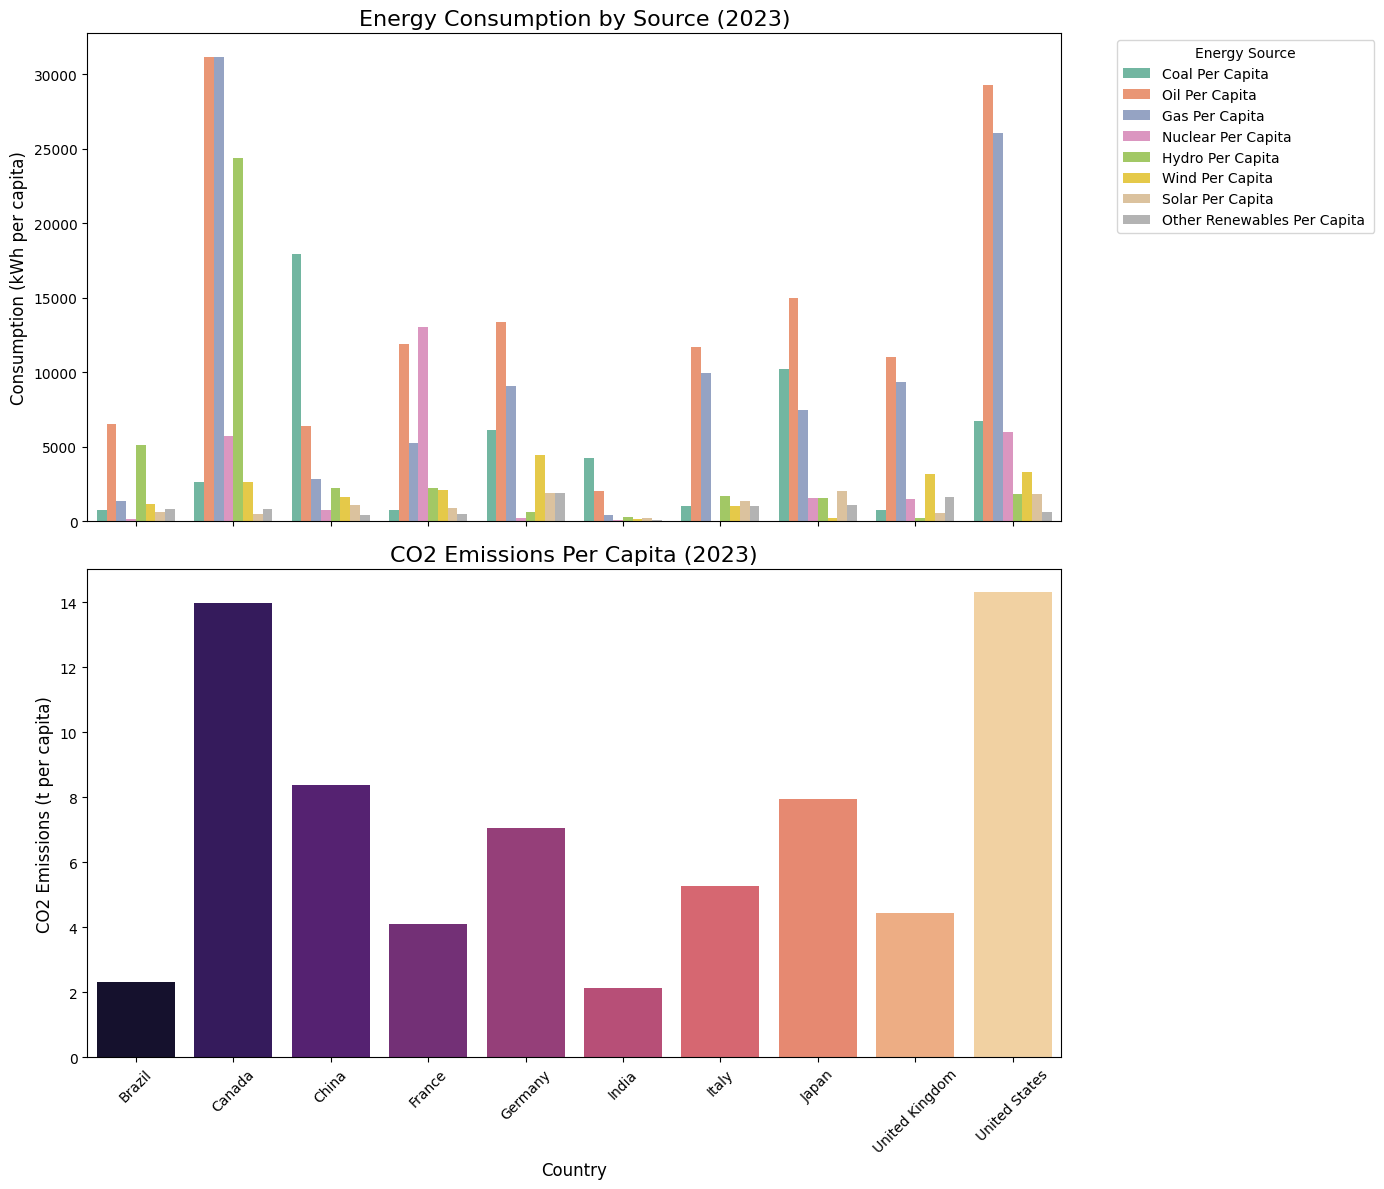

In [12]:

# Carregar os dados de energia
energy_mix_path = "./data/data_cleaned/cleaned_energy_mix_sources.parquet"  # ou "energy_mix.csv"
energy_data = pd.read_parquet(energy_mix_path)  # Substituir por read_csv se necessário

# Carregar os dados de emissões de CO2
co2_emissions_path = "./data/data_cleaned/cleaned_co2_emissions_per_capita.parquet"  # ou "co2_emissions_per_capita.csv"
co2_data = pd.read_parquet(co2_emissions_path)  # Substituir por read_csv se necessário

# Renomear colunas para facilitar o merge (garantir consistência)
co2_data.rename(columns={"Entity": "Country", "Year": "Year", "emissions_total_per_capita": "CO2 Emissions Per Capita"}, inplace=True)

# Unir os dois datasets (inner join para manter países e anos presentes em ambos)
merged_data = pd.merge(
    energy_data,
    co2_data,
    left_on=["Entity", "Year"],
    right_on=["Country", "Year"],
    how="inner"
)

# Filtrar os países desejados e o ano mais recente
countries = ["United States", "China", "India", "Germany", "Brazil", "Canada", "Japan", "France", "United Kingdom", "Italy"]  # Exemplos de países
latest_year = merged_data["Year"].max()
filtered_data = merged_data[(merged_data["Entity"].isin(countries)) & (merged_data["Year"] == latest_year)]

# Derreter os dados de consumo energético para formato longo
melted_energy = pd.melt(
    filtered_data,
    id_vars=["Entity", "Year", "CO2 Emissions Per Capita"],
    value_vars=[
        "coal_per_capita__kwh",
        "oil_per_capita__kwh",
        "gas_per_capita__kwh",
        "nuclear_per_capita__kwh__equivalent",
        "hydro_per_capita__kwh__equivalent",
        "wind_per_capita__kwh__equivalent",
        "solar_per_capita__kwh__equivalent",
        "other_renewables_per_capita__kwh__equivalent",
    ],
    var_name="Energy Source",
    value_name="Consumption (kWh per capita)"
)

# Ajustar os nomes das fontes de energia para uma exibição mais amigável
melted_energy["Energy Source"] = melted_energy["Energy Source"].str.replace("__kwh", "").str.replace("_equivalent", "").str.replace("_", " ").str.title()

# Visualização com gráficos combinados
fig, ax = plt.subplots(2, 1, figsize=(14, 12), sharex=True)

# Gráfico 1: Consumo de energia por fonte
sns.barplot(
    data=melted_energy,
    x="Entity",
    y="Consumption (kWh per capita)",
    hue="Energy Source",
    ax=ax[0],
    palette="Set2"
)
ax[0].set_title(f"Energy Consumption by Source ({latest_year})", fontsize=16)
ax[0].set_ylabel("Consumption (kWh per capita)", fontsize=12)
ax[0].legend(title="Energy Source", bbox_to_anchor=(1.05, 1), loc='upper left')

# Gráfico 2: Emissões de CO2 per capita
sns.barplot(
    data=filtered_data,
    x="Entity",
    y="CO2 Emissions Per Capita",
    hue = "Entity",
    ax=ax[1],
    palette="magma"
)
ax[1].set_title(f"CO2 Emissions Per Capita ({latest_year})", fontsize=16)
ax[1].set_ylabel("CO2 Emissions (t per capita)", fontsize=12)

# Configuração final
plt.xlabel("Country", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

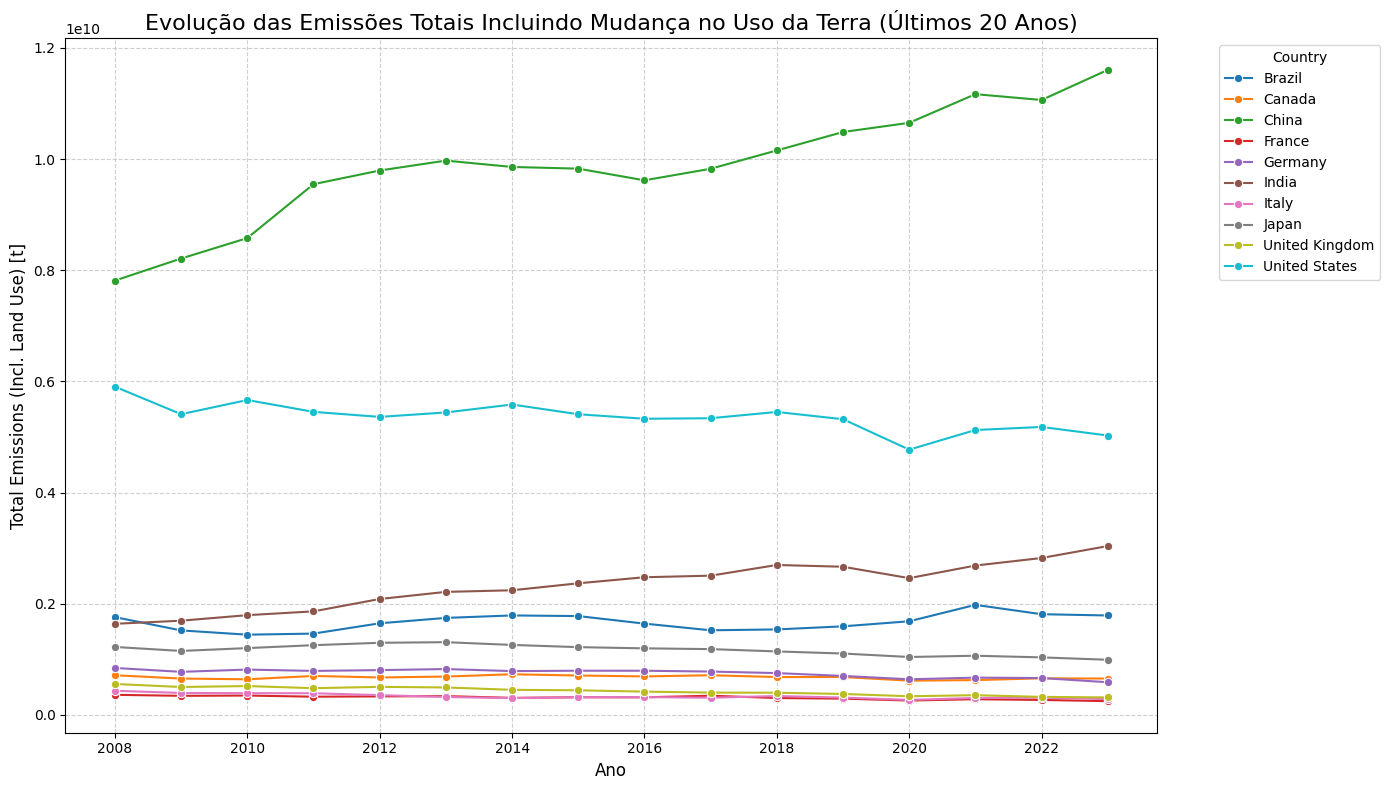

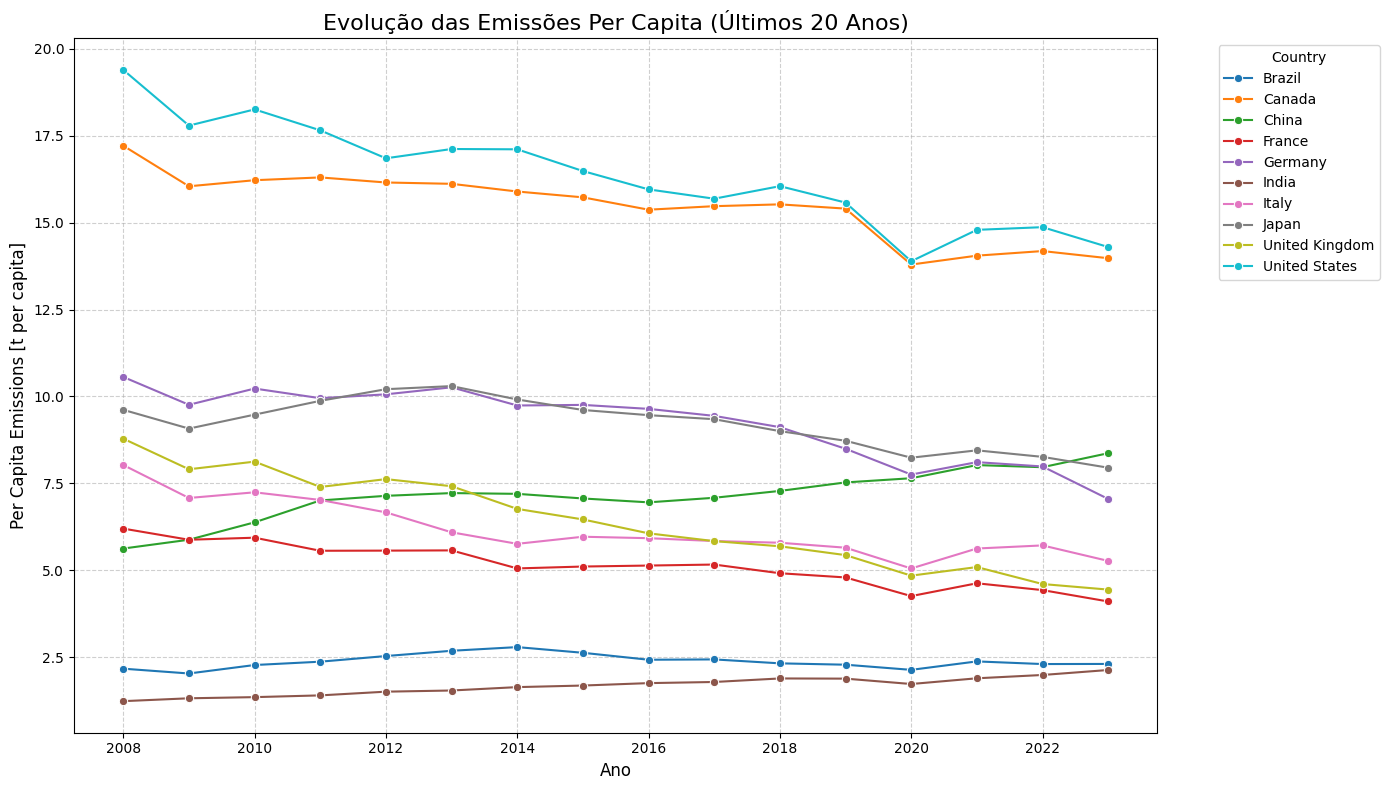

In [13]:
# Carregar os datasets
land_use_path = "./data/data_cleaned/cleaned_co2_land_use_total_emissions.parquet"
co2_per_capita_path = "./data/data_cleaned/cleaned_co2_emissions_per_capita.parquet"

land_use_data = pd.read_parquet(land_use_path)
co2_per_capita_data = pd.read_parquet(co2_per_capita_path)

# Renomear colunas para facilitar o merge
land_use_data.rename(columns={
    "emissions_total_including_land_use_change": "Total Emissions (Incl. Land Use)",
    "emissions_from_land_use_change": "Land Use Change Emissions",
    "emissions_total": "Total Emissions"
}, inplace=True)

co2_per_capita_data.rename(columns={
    "emissions_total_per_capita": "Per Capita Emissions"
}, inplace=True)

# Merge dos dois datasets
merged_data = pd.merge(
    land_use_data,
    co2_per_capita_data,
    on=["Entity", "Year"],
    how="inner"
)

# Filtrar os últimos 20 anos
latest_year = merged_data["Year"].max()
filtered_years = merged_data[(merged_data["Year"] >= latest_year - 15) & (merged_data["Year"] <= latest_year)]

# Filtrar somente os países desejados
countries = ["United States", "China", "India", "Germany", "Brazil", "United Kingdom", "France", "Italy", "Canada", "Japan"]
filtered_data = filtered_years[filtered_years["Entity"].isin(countries)]

# Configuração do gráfico
plt.figure(figsize=(14, 8))

# Gráfico 1: Total Emissions (Incl. Land Use)
sns.lineplot(
    data=filtered_data,
    x="Year",
    y="Total Emissions (Incl. Land Use)",
    hue="Entity",
    marker="o",
    palette="tab10"
)
plt.title("Evolução das Emissões Totais Incluindo Mudança no Uso da Terra (Últimos 20 Anos)", fontsize=16)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Total Emissions (Incl. Land Use) [t]", fontsize=12)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# Configuração do gráfico 2: Per Capita Emissions
plt.figure(figsize=(14, 8))

sns.lineplot(
    data=filtered_data,
    x="Year",
    y="Per Capita Emissions",
    hue="Entity",
    marker="o",
    palette="tab10"
)
plt.title("Evolução das Emissões Per Capita (Últimos 20 Anos)", fontsize=16)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Per Capita Emissions [t per capita]", fontsize=12)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()